In [241]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [433]:
# Fitness function for exercise 9.1
# return the number of 1s in a string
def count_1s(s):
    count = 0
    for i in range(len(s)):
        if s[i] == "1":
            count+=1
    return count

In [354]:
# Function that initializes the chromosomes
# N : number of chromosomes
# L : lenght of each chromosome
def initiate_chromosomes(N,L,fit_func):
    chromosomes = []
    weights = []
    for i in range(N):
        chrom = ""
        for i in range(L):
            chrom += str(np.random.randint(2))
        chromosomes.append(chrom)
    # calculate the fitness of each chromosome
    for chromos in chromosomes:
        weights.append(fit_func(chromos))
    
    assert len(chromosomes) == len(weights)
    # normalize the fitness of each chromosome
    weights = np.array(weights, dtype="float64")
    weights = weights/np.sum(weights)
    
    # return the chromosomes list and their respective weights
    return chromosomes, weights

In [288]:
# Function that checks the chromosomes list to
# check if a chromosome contains only 1s
def termination_satisfied(chromos, fit_func):
    for i in chromos:
        if fit_func(i) == len(i):
            print(i)
            return True
    return False

In [289]:
# Function to mutate genes in chromosomes
# s : string to be mutated
# mut_prob : probability of mutation
def mutate(s, mut_prob):
    new_s = ""
    for i in s:
        if np.random.rand() < mut_prob:
            if i == "1":
                new_s += "0"
            else:
                new_s += "1"
        else:
            new_s += i
    return new_s

In [290]:
# Function for offspring production with crossover and mutation
# chro1 : first chromosome
# chro2 : second chromosome
# p : points of crossover
# ex_prob : crossover probability
# mut_prob : mutation probability
def exchange(chro1, chro2, p, ex_prob, mut_prob):
    s1 = ""
    s2 = ""
    if np.random.rand() < ex_prob:
        # crossover
        # first chromosome
        s1 += chro1[:p]
        s1 += chro2[p:]
        # second chromosome
        s2 += chro2[:p]
        s2 += chro1[p:]
    else:
        s1 = chro1
        s2 = chro2
    # Mutation of chromosomes
    s1 = mutate(s1, mut_prob)
    s2 = mutate(s2, mut_prob)
    
    return s1,s2

In [360]:
# calculate fitness of each chromosome and then normalize
def generate_new_weights(chromes, fit_func):
    weights = []
    for i in chromes:
        weights.append(fit_func(i))
    weights = np.array(weights,dtype="float64")
    weights = weights/np.sum(weights)
    
    return weights

In [361]:
# Function to generate a new population with offsprings
def generate_new_popul(chromes, weights, fit_func, point, ex_prob, mut_prob):
    new_population = []
    N = len(chromes)
    
    while len(new_population) < N:
        # randomly select two parents
        ind1, ind2 = np.random.choice(list(range(N)), size=2, replace=False, p=weights)
        # generate offsprings
        child1, child2 = exchange(chromes[ind1], chromes[ind2], point, ex_prob, mut_prob)
        # add the offsprings to the new population
        new_population.append(child1)
        if len(new_population) < N:
            new_population.append(child2)
    
    # get the weights of the new population
    weights = generate_new_weights(new_population, fit_func)

    return new_population, weights

<h1>Άσκηση 9.1</h1>

In [331]:
def experiment1(iterations, N, L, fit_func, cross_p, ex_prob, mut_prob):
    # initialize the chromosome sequence
    chromes, weights = initiate_chromosomes(N,L,fit_func)
    best_values = []
    
    for i in tqdm(range(iterations)):
        # Generate a new population
        chromes, weights = generate_new_popul(chromes, weights, fit_func, cross_p, ex_prob, mut_prob)
        # Save the best fitness of the new population
        best_values.append(fit_func(chromes[np.argmax(weights)]))
        
        # Check if a solution has been found
        if termination_satisfied(chromes, fit_func):
            print("Found Solution",f"Generation number:{i}")
            break
            
    # Plot best fitness of each generation
    plt.plot(best_values)
    plt.xlabel("Generations")
    plt.ylabel("Fitness(% of 1s)")
    plt.title("Best fitness of the population")
    plt.show()

Αν και έτρεξα τον αλγόριθμο για 100.000 γενίες ήταν ξεκάθαρο ότι ο αλγόριθμος αδυνατούσε να συγκλίνει. Οι τιμές τις συνάρτησης προσαρμογής ηταν κυρίως μεταξύ 80 και 90. Ενδεικτικά παρακάτω φαινόνται κάποια τρεξίματα του αλγορίθμου για 20.000 γενίες με διαφορετικες τιμές ως προς το σημείο διασταύρωσης και την πιθανότητα διασταύρωσης, όπου επίσης διακρίνουμε ότι ο αλγόριθμος αδυνατεί να συγκλίνει. Φαίνεται ότι η μετάλλαξη με διασταύρωση βρίσκει καλύτερες λύσεις. Αυτό οφείλεται στο γεγονός ότι με την διασταύρωση ελέγχουμε λύσεις που είναι λιγότερο όμοιες με τις λύσεις τις προηγούμενης γενίας. Αυτο επίσης έχει σαν αποτέλεσμα ο αλγόριθμος να μπορεί πίο εύκολα να ξεφύγει από τοπικά ελάχιστα. 

100%|██████████| 20000/20000 [02:11<00:00, 151.52it/s]


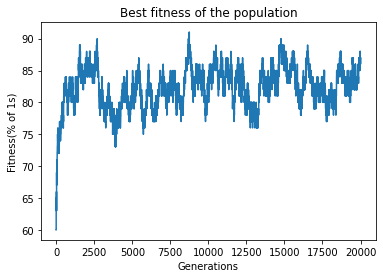

In [332]:
# crosspoint = 50, crossover prob = 0.7
experiment1(20000, 100, 100, count_1s, 50, 0.7, 0.001)

100%|██████████| 20000/20000 [02:11<00:00, 151.78it/s]


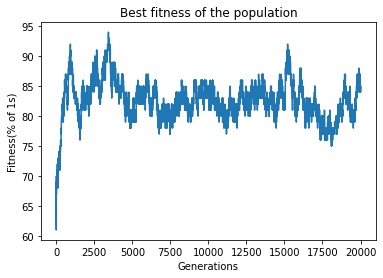

In [316]:
# crosspoint = 50, crossover prob = 0.2
experiment1(20000,100,100,count_1s,50,0.2,0.001)

100%|██████████| 20000/20000 [02:11<00:00, 152.47it/s]


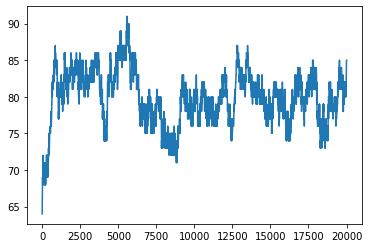

In [280]:
# crosspoint = 50, crossover prob = 0
experiment1(20000,100,100,count_1s,50,0,0.001)

100%|██████████| 20000/20000 [02:12<00:00, 151.46it/s]


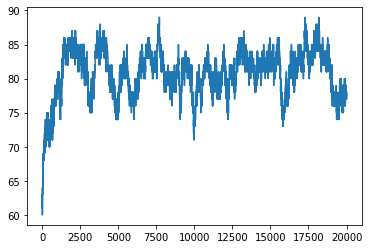

In [281]:
# crosspoint = 30, crossover prob = 0.7
experiment1(20000,100,100,count_1s,30,0.7,0.001)

100%|██████████| 20000/20000 [02:11<00:00, 152.33it/s]


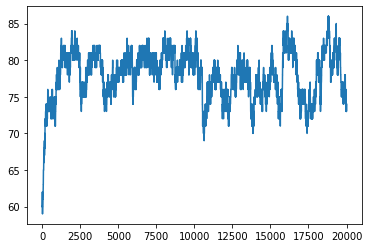

In [277]:
# crosspoint = 30, crossover prob = 0
experiment1(20000,100,100,count_1s,30,0,0.001)

In [ ]:
# crosspoint = 30, crossover prob = 0.4
experiment1(20000,100,100,count_1s,30,0,0.001)

<h1>Άσκηση 9.2</h1>

In [432]:
# Fitness function for exercise 9.2
# Get the decimal number out of a binary string
def fitness2(s):
    s = s[::-1]
    val = 0
    for i in range(len(s)):
        if s[i] == "1":
            val += 2**i
        
    return val

In [431]:
def experiment2(iterations, N, L, fit_func, cross_p, ex_prob, mut_prob):
    # initialize the chromosome sequence
    chromes, weights = initiate_chromosomes(N,L,fit_func)
    best_fit = []
    avg_fit = []
    for i in tqdm(range(iterations)):
        # Generate a new population
        chromes, weights = generate_new_popul(chromes, weights, fit_func, cross_p, ex_prob, mut_prob)
        # Save the fittest of the new population
        best_fit.append(fit_func(chromes[np.argmax(weights)]))
        # Save the average fitness of the new population
        average = 0
        for c in chromes:
            average += fit_func(c)
        avg_fit.append(average/len(chromes))
    
    # Uncomment to plot fittest and average fitness each time an experiment is executed
    # Plot fittest and the average fitness of each generation
    #plt.plot(best_fit, label="Best Fit")
    #plt.plot(avg_fit, label="Average Fit")
    #plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    #plt.xlabel("Generation")
    #plt.ylabel("Fitness")
    #plt.title("Best fitness of the population")
    #plt.show()
    
    return best_fit, avg_fit

In [400]:
statistics = []
# Population size = 100
best, avg = experiment2(100,100,100,fitness2,50,0.7,0.001)
statistics.append({"pop":100,"cross":0.7,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 110.38it/s]


In [401]:
# Population size = 200
best, avg = experiment2(100,200,100,fitness2,50,0.7,0.001)
statistics.append({"pop":200,"cross":0.7,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:01<00:00, 54.63it/s]


In [402]:
# Population size = 500
best, avg = experiment2(100,500,100,fitness2,50,0.7,0.001)
statistics.append({"pop":500,"cross":0.7,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:05<00:00, 19.38it/s]


In [403]:
# Population size = 50
# Population size = 500
best, avg = experiment2(100,50,100,fitness2,50,0.7,0.001)
statistics.append({"pop":50,"cross":0.7,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 224.49it/s]


In [404]:
# Population size = 100, cross = 0.4
best, avg = experiment2(100,100,100,fitness2,50,0.4,0.001)
statistics.append({"pop":100,"cross":0.4,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 115.22it/s]


In [405]:
# Population size = 100, cross = 0.9, mut = 0.01
best, avg = experiment2(100,100,100,fitness2,50,0.9,0.01)
statistics.append({"pop":100,"cross":0.9,"mut":0.01,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 108.73it/s]


In [406]:
# Population size = 100, cross = 0.9, mut = 0.0001
best, avg = experiment2(100,100,100,fitness2,50,0.9,0.0001)
statistics.append({"pop":100,"cross":0.9,"mut":0.0001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 108.64it/s]


In [407]:
# Population size = 100, cross = 0, mut = 0.001
best, avg = experiment2(100,100,100,fitness2,50,0,0.001)
statistics.append({"pop":100,"cross":0,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:00<00:00, 109.89it/s]


In [430]:
# Population size = 500, cross = 0, mut = 0.001
best, avg = experiment2(100,500,100,fitness2,50,0,0.001)
statistics.append({"pop":500,"cross":0,"mut":0.001,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:05<00:00, 19.55it/s]


In [409]:
# Population size = 500, cross = 0, mut = 0.01
best, avg = experiment2(100,500,100,fitness2,50,0,0.01)
statistics.append({"pop":500,"cross":0,"mut":0.01,
                   "best": best, "avg": avg})

100%|██████████| 100/100 [00:05<00:00, 19.63it/s]


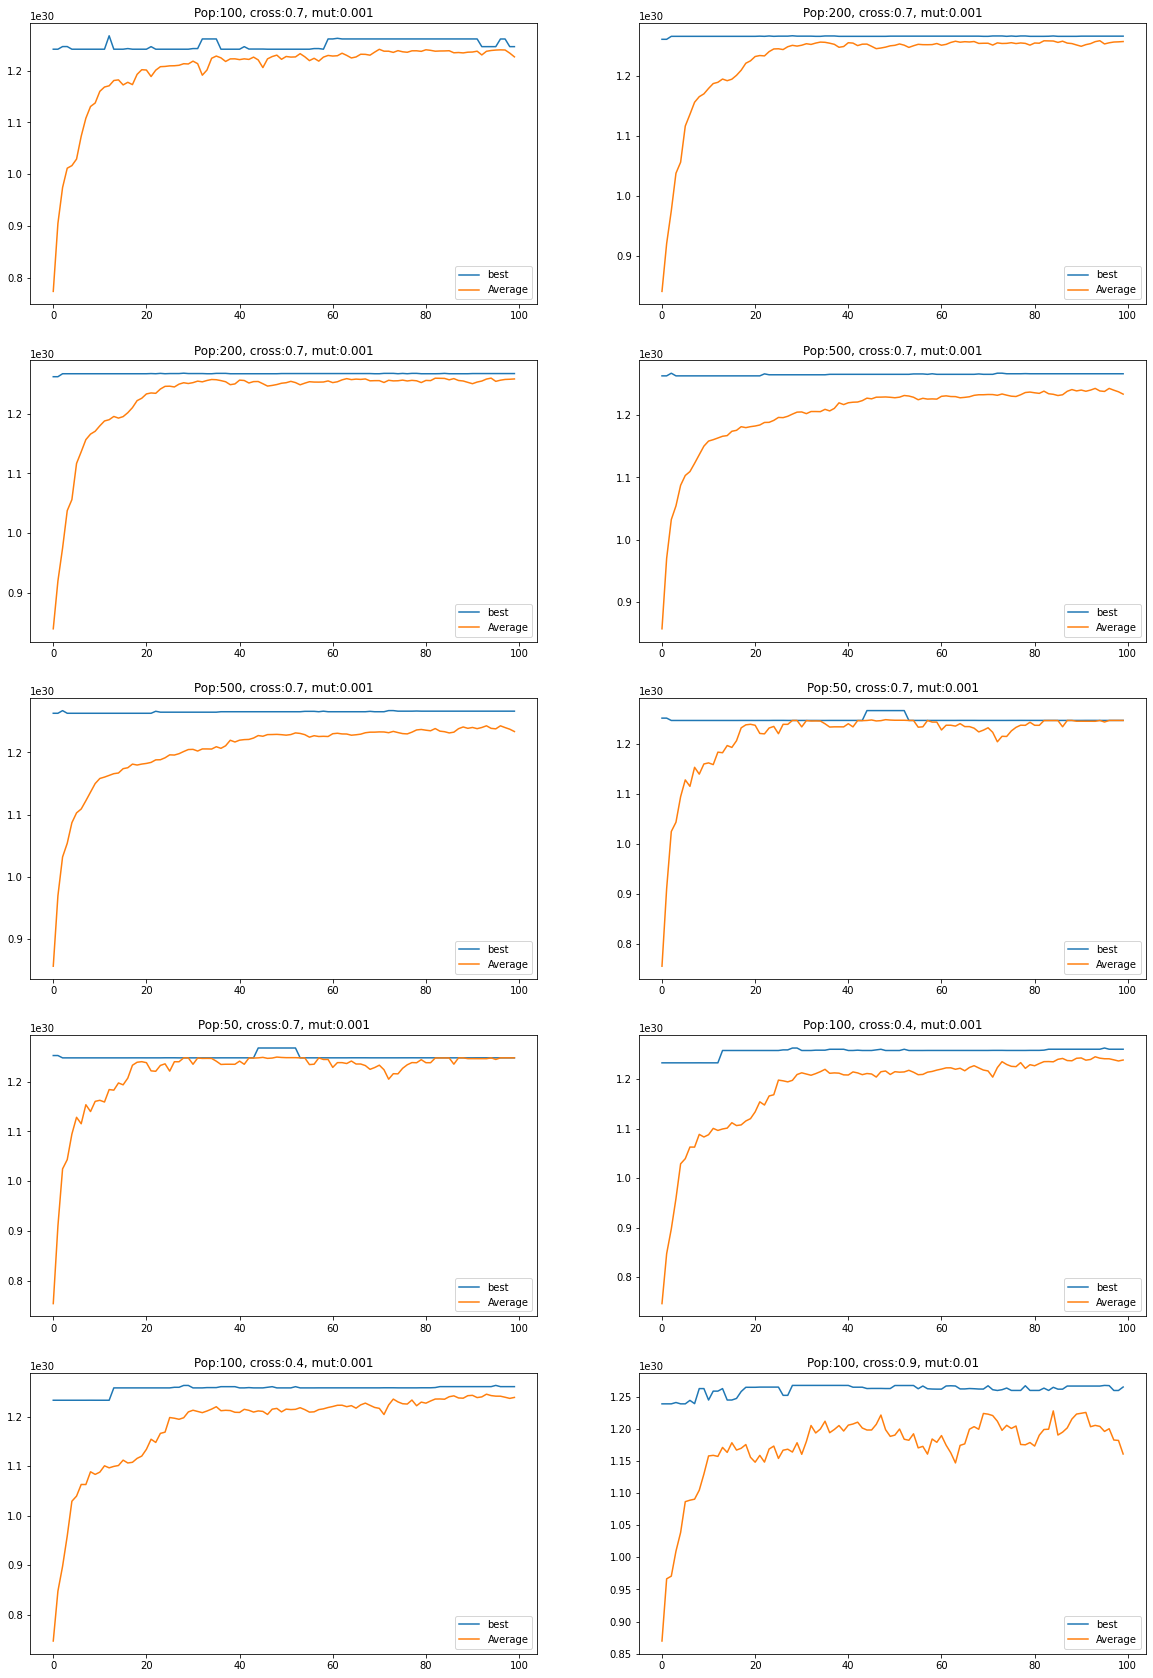

In [429]:
# Plot best and average for each generation for each experiment
fig, ax = plt.subplots(5,2,figsize=(20,30))
for i in range(5):
    for j in range(2):
        ax[i][j].plot(statistics[i+j]["best"], label="best")
        ax[i][j].plot(statistics[i+j]["avg"], label="Average")
        ax[i][j].legend(loc="best")
        title = "Pop:{}, cross:{}, mut:{}".format(statistics[i+j]["pop"],statistics[i+j]["cross"],
                                                  statistics[i+j]["mut"])
        ax[i][j].set_title(title)
        